In [158]:
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report


In [159]:
telco_data = pd.read_csv(r'C:\Users\TIFF\Documents\Customer Churn Prediction\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [160]:
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [161]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [162]:
# Summary statistics for numerical columns

telco_data.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [163]:
### converting total charges to numeric

telco_data['TotalCharges']= pd.to_numeric(telco_data['TotalCharges'], errors='coerce')


In [164]:
### checking for missing values

missing_values = telco_data.isnull().sum()
print(missing_values)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [165]:
### dropping rows with the missing values
telco_data.dropna(subset=["TotalCharges"], inplace=True)
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [166]:
### dropping the customerID

telco_data.drop(columns=['customerID'], inplace=True)



In [167]:
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


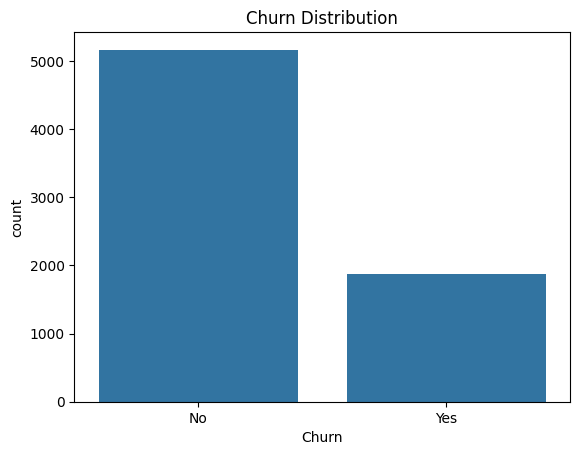

In [168]:
### plotting a bar chart of the churn column
sns.countplot(data=telco_data, x='Churn')
plt.title('Churn Distribution')
plt.show()


In [169]:
telco_data['Churn'].value_counts()


Churn
No     5163
Yes    1869
Name: count, dtype: int64

# how the churn differs from different categories

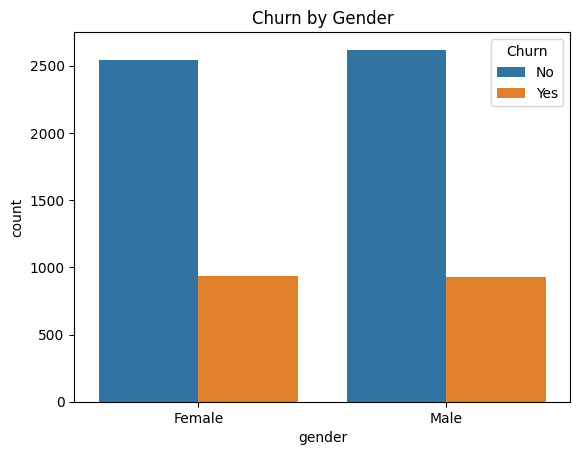

In [170]:
sns.countplot(data=telco_data, x= "gender", hue="Churn")
plt.title("Churn by Gender")
plt.show()

In [171]:
telco_data.pivot_table(index='gender', columns='Churn', aggfunc='size')


Churn,No,Yes
gender,,
Female,2544,939
Male,2619,930


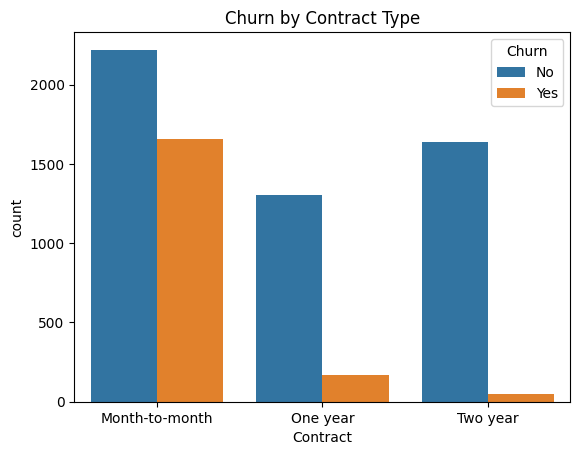

In [172]:
### churn by contract type
sns.countplot(data=telco_data, x="Contract",hue="Churn")
plt.title("Churn by Contract Type")
plt.show()

In [173]:
telco_data.pivot_table(index="Contract", columns="Churn", aggfunc="size")

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1306,166
Two year,1637,48


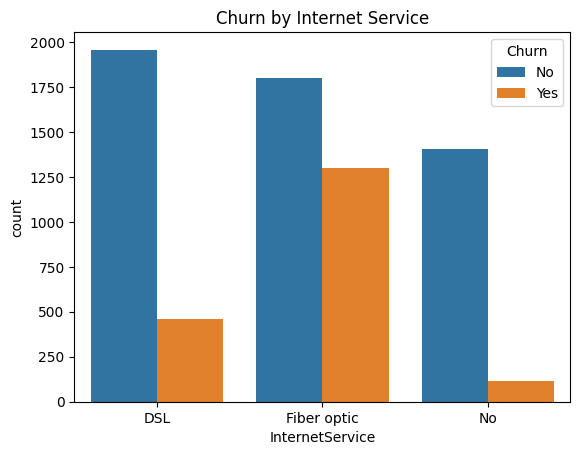

In [174]:
### churn by InternetService

sns.countplot(data=telco_data, x="InternetService", hue="Churn")
plt.title("Churn by Internet Service")
plt.show()



In [175]:
telco_data.pivot_table(index="InternetService", columns="Churn", aggfunc="size")

Churn,No,Yes
InternetService,,
DSL,1957,459
Fiber optic,1799,1297
No,1407,113


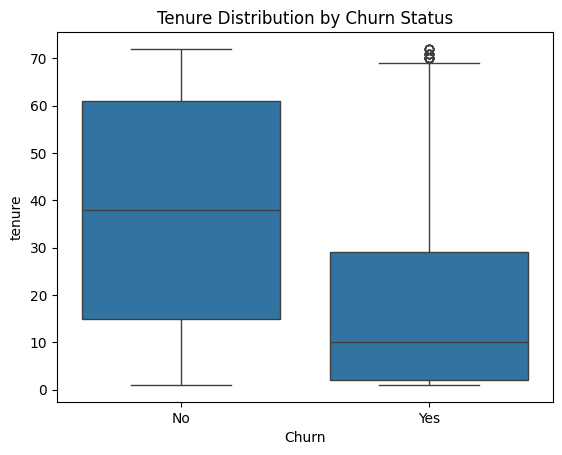

In [176]:
### churn by tenure 
sns.boxplot(data=telco_data,x="Churn",y="tenure")
plt.title('Tenure Distribution by Churn Status')
plt.show()


In [177]:
telco_data.groupby('Churn')['tenure'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5163.0,37.650010,24.076940,1.0,15.0,38.0,61.0,72.0
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


In [178]:
### monthlycharges
telco_data.groupby('Churn')['MonthlyCharges'].describe()


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5163.0,61.307408,31.094557,18.25,25.10,64.45,88.475,118.75
Yes,1869.0,74.441332,24.666053,18.85,56.15,79.65,94.200,118.35


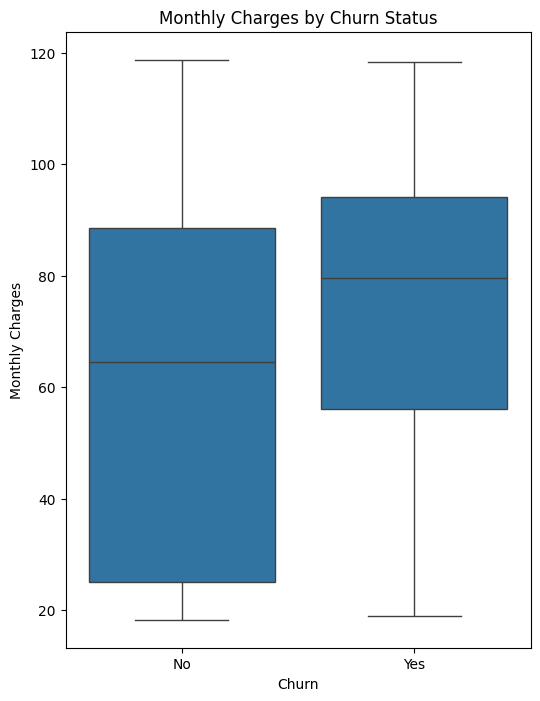

In [179]:
plt.figure(figsize=(6, 8))
sns.boxplot(data=telco_data, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges by Churn Status')
plt.ylabel('Monthly Charges')
plt.xlabel('Churn')
plt.show()


In [180]:

telco_data = pd.read_csv(r"C:\Users\TIFF\Documents\Customer Churn Prediction\WA_Fn-UseC_-Telco-Customer-Churn.csv")


In [181]:
# Replace any blank strings or spaces with NaN
telco_data['TotalCharges'] = telco_data['TotalCharges'].replace(" ", pd.NA)

In [182]:
telco_data['TotalCharges'] = pd.to_numeric(telco_data['TotalCharges'], errors='coerce')
telco_data['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

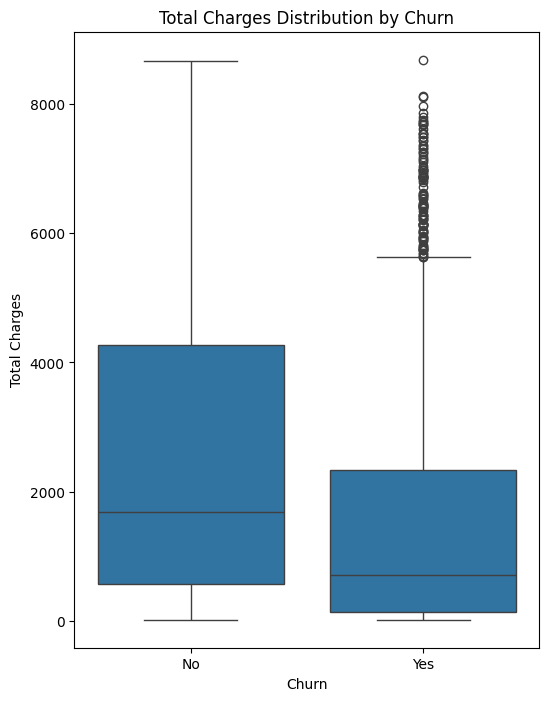

In [183]:
plt.figure(figsize=(6, 8))
sns.boxplot(data=telco_data, x='Churn', y='TotalCharges')
plt.title('Total Charges Distribution by Churn')
plt.ylabel('Total Charges')
plt.xlabel('Churn')
plt.show()

In [184]:
### showing all object type
telco_data.select_dtypes(include='object').columns


Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [185]:
### assigning 

binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in binary_cols:
    telco_data[col] = telco_data[col].map({'Yes': 1, 'No': 0, 'Female': 0, 'Male': 1})


In [186]:
### confirmation 

telco_data[['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']].head()


,gender,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,0,1,0,0,1,0
1,1,0,0,1,0,0
2,1,0,0,1,1,1
3,1,0,0,0,0,0
4,0,0,0,1,1,1


In [187]:
multi_cat_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 
                  'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                  'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

# One-hot encode them
telco_data = pd.get_dummies(telco_data, columns=multi_cat_cols)


In [188]:
### new column names

telco_data.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
      

In [189]:
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,True,False,False,True,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,...,True,False,False,False,True,False,False,False,False,True
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,True,False,False,True,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,True,False,False,False,True,False,True,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,True,False,False,True,False,False,False,False,True,False


In [190]:
# Convert boolean values to integers 

telco_data = telco_data.astype({col: int for col in telco_data.select_dtypes('bool').columns})


In [191]:
### dropping the customer id column

telco_data.drop('customerID', axis=1, inplace=True)


In [192]:
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


In [193]:
### scalling the values
num_cols_to_scale=['tenure', 'MonthlyCharges', 'TotalCharges']

In [194]:
from sklearn.preprocessing import StandardScaler

In [195]:
scaler = StandardScaler()

In [196]:

telco_data[num_cols_to_scale]=scaler.fit_transform(telco_data[num_cols_to_scale])


In [197]:
telco_data[num_cols_to_scale].describe()

,tenure,MonthlyCharges,TotalCharges
count,7.043000e+03,7.043000e+03,7.032000e+03
mean,-2.421273e-17,-6.406285e-17,8.159318e-17
std,1.000071e+00,1.000071e+00,1.000071e+00
min,-1.318165e+00,-1.545860e+00,-9.990692e-01
25%,-9.516817e-01,-9.725399e-01,-8.302488e-01
50%,-1.372744e-01,1.857327e-01,-3.908151e-01
75%,9.214551e-01,8.338335e-01,6.668271e-01
max,1.613701e+00,1.794352e+00,2.824261e+00


In [198]:
# Split features and target
X = telco_data.drop('Churn', axis=1)  # Features
y = telco_data['Churn']               # Target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 20% goes to test set
    random_state=42,     # Ensures reproducibility of the split
    stratify=y           # Keeps churn ratio consistent across train/test
)

In [199]:
print("Training features:", X_train.shape)
print("Training labels:", y_train.shape)
print("Testing features:", X_test.shape)
print("Testing labels:", y_test.shape)

Training features: (5634, 40)
Training labels: (5634,)
Testing features: (1409, 40)
Testing labels: (1409,)


In [200]:
print("Missing values in X_train:\n", X_train.isnull().sum().sort_values(ascending=False).head())
print("\nMissing values in X_test:\n", X_test.isnull().sum().sort_values(ascending=False).head())

Missing values in X_train:
 TotalCharges     8
gender           0
Partner          0
SeniorCitizen    0
tenure           0
dtype: int64

Missing values in X_test:
 TotalCharges     3
gender           0
Partner          0
SeniorCitizen    0
tenure           0
dtype: int64


In [201]:
# Fill missing TotalCharges in train and test with the mean from each set
X_train['TotalCharges'] = X_train['TotalCharges'].fillna(X_train['TotalCharges'].mean())
X_test['TotalCharges'] = X_test['TotalCharges'].fillna(X_test['TotalCharges'].mean())


In [202]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [203]:
### making prediction on the test set
y_pred = log_model.predict(X_test)

### accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.8055358410220014


In [204]:
### confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)

[[926 109]
 [165 209]]


In [205]:
### classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



### Trying Different Models for Comparison

Although we started with Logistic Regression, it didn't perform as well on predicting churners (customers who left).
 This is common with class imbalance problems—where one class (non-churners) has more examples than the other (churners).
To improve the model's performance, especially on identifying churners, we are now trying more powerful models:
- Random Forest: A robust ensemble method that uses multiple decision trees.
- XGBoost: A high-performance boosting algorithm that often gives strong results in classification problems.

 We'll compare their performance to Logistic Regression and select the best one for our final model.


In [206]:
### Training the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Training the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

### Making predictions
y_pred_rf = rf_model.predict(X_test)

### Evaluation



In [207]:
### Training the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

### Making predictions
y_pred_rf = rf_model.predict(X_test)

### Evaluation

print(accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

0.7821149751596878
[[913 122]
 [185 189]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1035
           1       0.61      0.51      0.55       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.78      1409



In [208]:
### Training and evaluating a Random Forest Classifier
# This is the second model being tested after Logistic Regression.
# Random Forest is a tree-based ensemble model that often performs well on structured data.
# We'll compare its performance with the previous model and the upcoming XGBoost model.


In [209]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [210]:
### Training and evaluating an XGBoost Classifier
from xgboost import XGBClassifier

# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

print((y_test, y_pred_xgb))
print((y_test, y_pred_xgb))
print((y_test, y_pred_xgb))


c:\Users\TIFF\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:44:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


(437     0
2280    0
2235    0
4460    0
3761    0
       ..
5143    0
4439    0
3857    0
4758    0
5613    0
Name: Churn, Length: 1409, dtype: int64, array([0, 1, 0, ..., 0, 0, 0], shape=(1409,)))
(437     0
2280    0
2235    0
4460    0
3761    0
       ..
5143    0
4439    0
3857    0
4758    0
5613    0
Name: Churn, Length: 1409, dtype: int64, array([0, 1, 0, ..., 0, 0, 0], shape=(1409,)))
(437     0
2280    0
2235    0
4460    0
3761    0
       ..
5143    0
4439    0
3857    0
4758    0
5613    0
Name: Churn, Length: 1409, dtype: int64, array([0, 1, 0, ..., 0, 0, 0], shape=(1409,)))


### 🔍 Model Comparison Summary

We tested three models to predict customer churn:
- **Logistic Regression** achieved the highest accuracy of **80.6%**, and better balance across churners and non-churners.
- **Random Forest** had an accuracy of **78.2%** but struggled more with recall for churners.
- **XGBoost** performed similarly at **78.6%**, with slightly better precision on churners than Random Forest.

📌 **Final Model Selected**: Logistic Regression – best performance and simpler to interpret.


In [211]:
### saving the trained Logistic Regression model
import joblib

joblib.dump(log_model, 'customer_churn_logistic_regression.pkl')


['customer_churn_logistic_regression.pkl']